In [1]:
import sys
sys.path.insert(1, r'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\stardist\workflow')
from functions import TileSetScorer, ScoringSubroutine

In [2]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
import json
matplotlib.rcParams["image.interpolation"] = 'nearest'
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from glob import glob
from tqdm import tqdm
from tifffile import imread
import struct
import pandas as pd
import cv2
from csbdeep.utils import Path, normalize
from glob import glob

from stardist import fill_label_holes, random_label_cmap, calculate_extents, gputools_available
from stardist.models import Config2D, StarDist2D, StarDistData2D

In [3]:
def load_model(model_path: str) -> StarDist2D:
    # Load StarDist model weights, configurations, and thresholds
    with open(model_path + '\\config.json', 'r') as f:
        config = json.load(f)
    with open(model_path + '\\thresholds.json', 'r') as f:
        thresh = json.load(f)
    model = StarDist2D(config=Config2D(**config), basedir=model_path, name='offshoot_model')
    model.thresholds = thresh
    print('Overriding defaults:', model.thresholds, '\n')
    model.load_weights(model_path + '\\weights_best.h5')
    return model

In [4]:
model_pths = r'\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models'
pths = os.listdir(model_pths)
pths = ["".join([model_pths, '\\', pth]) for pth in pths if 'monkey' in pth]

In [63]:
for pth in pths:
    print(pth)

\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0
\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0.1
\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0
\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0.1
\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0
\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0.1
\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0
\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0.1
\\10.99.

In [6]:
models = [load_model(pth) for pth in pths]

base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7193147122688542, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7175685959330165, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7096244997901542, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5993075455383543, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6465368267180926, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6272559838417484, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6423720004434031, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6029333830621246, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_200_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7088475883116463, nms=0.4) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_200_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7226258816456594, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7150747128646731, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_200_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6644309540700706, nms=0.4) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_200_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6741093980447063, nms=0.4) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_200_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6674700907222013, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_200_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7103989400767474, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_200_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7093577882459325, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_400_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7193788029211772, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_400_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5784959528176862, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_400_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6007545175576091, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_400_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6827932983240342, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_400_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5702077298306483, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_400_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6433557614903105, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_400_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6226221928635809, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_400_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6473812333175051, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_100_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.507985092393676, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_100_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6494678497203604, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_100_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6436913901988487, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_100_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6048723515928974, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_100_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5959399171380368, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_100_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6058867221410684, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_100_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.4897325336933136, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_100_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6403874501959977, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_200_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6483555753310399, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_200_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6532193018854562, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_200_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6897838427368774, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_200_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5882753383712404, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_200_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7330644097698761, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_200_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7186142163597486, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_200_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.694660766506942, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_200_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5636410105299758, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6883699162882626, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5437074435648168, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6965555953031608, nms=0.4) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6290494337468707, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6077151311285766, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6695935591613997, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7301812303223087, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6368034494839518, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_100_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5506141283396465, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_100_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7281218018036345, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_100_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5960276629997058, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_100_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.612137530447405, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_100_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7153868694368812, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_100_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5660367115246221, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_100_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.4904283285140991, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_100_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5489763759465447, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_200_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.4889400895883759, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_200_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5995749045449638, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_200_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7406981871827287, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_200_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5649808690452636, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_200_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5408919605345319, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_200_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.4940419016275986, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_200_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.564337441458952, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_200_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6295975151441642, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_400_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.50088921380033, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_400_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5438236235834504, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_400_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6884361152950393, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_400_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5213037542912653, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_400_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5089949650831375, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_400_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5186994292123628, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_400_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6512776853705287, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.003_epochs_400_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.4824041247848596, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_100_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6099978661171485, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_100_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.12738517921556494, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_100_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.11216729038938755, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_100_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.12002717171034379, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_100_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.3554390903406468, nms=0.4) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_100_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5184141196254533, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_100_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6806596203493362, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_100_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.13549647286941455, nms=0.4) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5831526230588839, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5137473972527806, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5151846496617747, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6575419283231818, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7008817406760679, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5922532741627455, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.11256776483361276, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.11566693239386894, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_400_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5009407372586778, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_400_pt_10_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.11429801876463558, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_400_pt_20_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.1269727264361621, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_400_pt_20_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.125878783783625, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_400_pt_30_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.4972014312495814, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_400_pt_30_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.09494988367404089, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_400_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.5706334814401934, nms=0.3) 


base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_400_pt_40_gaus_ratio_0.1\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.12045020965240208, nms=0.3) 


In [7]:
# load tile images and masks
pthHE = r'\\10.99.68.178\andreex\data\Stardist\Testing\monkey\tiles'
pthmasks = r'\\10.99.68.178\andreex\data\Stardist\Testing\monkey\qupath\ground_truth\masks'

HE_tiles_pths = sorted(glob(os.path.join(pthHE,'*.tif')))
mask_tiles_pths = sorted(glob(os.path.join(pthmasks,'*.tif')))

HE_tiles = list(map(imread,HE_tiles_pths))
mask_tiles = list(map(imread,mask_tiles_pths))

HE_tiles = [x/255 for x in HE_tiles]  # just divide by 255 to get into (0,1) range
mask_tiles = [fill_label_holes(y) for y in mask_tiles]  # fills holes in annotations if there are any

In [8]:
def get_predictions(model):
    mask_val_pred = [model.predict_instances(x, n_tiles=model._guess_n_tiles(x), show_tile_progress=False)[0]
              for x in tqdm(HE_tiles)]

    return mask_val_pred

In [9]:
def get_f1(tp, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    avg_precision = tp / (tp + fp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    return precision, recall, avg_precision, f1

In [10]:
def find_first_unique_indices(lst):
    unique_indices = {}
    result = []

    for i, value in enumerate(lst):
        if value not in unique_indices:
            unique_indices[value] = i

    for value in lst:
        result.append(unique_indices[value])

    return result

In [11]:
def get_organ_f1(result):
    names = result['Image']

    names = [name.split(".")[0][21:] for name in names]

    for i in range(len(names)):
        #if len(names[i]) > 6:
        names[i] = names[i][:2]

    result_list = find_first_unique_indices(names)

    f1_scores = result['F1 Score']

    seen = []
    names = []

    raw_vals = result[['Image', 'TP', 'FP', 'FN', 'Avg Precision']]

    TPs = [0 for _ in range(len(raw_vals))]
    FPs = [0 for _ in range(len(raw_vals))]
    FNs = [0 for _ in range(len(raw_vals))]
    APs = [0 for _ in range(len(raw_vals))]

    for i in range(len(raw_vals)):
        row = raw_vals.iloc[i]
        num = result_list[i]
        if num not in seen:
            names.append(raw_vals['Image'][i])
            seen.append(num)

        TPs[num] += row['TP']
        FPs[num] += row['FP']
        FNs[num] += row['FN']
        APs[num] += row['Avg Precision']

    organ_names = []
    for i in range(len(names)):
        nm = names[i][21:-4]
        if nm[-1] == '1':
            nm = nm[:-1]
        organ_names.append(nm)

    TPs = [val for val in TPs if val != 0]
    FPs = [val for val in FPs if val != 0]
    FNs = [val for val in FNs if val != 0]
    APs = [val for val in APs if val != 0]

    if [len(organ_names), len(TPs), len(FPs), len(FNs)] != [len(organ_names), len(organ_names), len(organ_names), len(organ_names)]:
        print('skipped')
        return 0

    new_df = pd.DataFrame({'Organ': organ_names, 'TP': TPs, 'FP': FPs, 'FN': FNs, 'AP': APs})

    precisions = []
    recalls = []
    f1s = []
    APs = []

    for i in range(len(new_df)):
        row = new_df.iloc[i]

        tp = row['TP']
        fp = row['FP']
        fn = row['FN']

        precision, recall, avg_precision, f1 = get_f1(tp, fp, fn)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        APs.append(avg_precision)

    new_df['Recall'] = recalls
    new_df['Precision'] = precisions
    new_df['F1'] = f1s
    new_df['AP'] = APs

    return new_df

In [12]:
# variables for plotting and stuff
nms = [os.path.basename(file) for file in HE_tiles_pths]

taus = [0.5, 0.6, 0.7, 0.8, 0.9]

predictions = [get_predictions(model) for model in models]

scores = []

for tau in taus:
    print(tau)
    scores_tau = []
    for model_prediction in predictions:
        score = TileSetScorer(nms, mask_tiles, model_prediction, [tau])
        scores_tau.append(score)
    scores.append(scores_tau)

100%|██████████| 36/36 [00:05<00:00,  6.61it/s]


0.5
0.6
0.7
0.8
0.9


In [14]:
results = []
for score_list in scores:
    result_dfs = []
    for score in score_list:
        result_dfs.append(score.score_set())
    results.append(result_dfs)

In [20]:
len(results[0])

96

In [21]:
len(results)

5

In [30]:
for i,df_list in enumerate(results):
    for j,df in enumerate(df_list):
        print(i, j)
        print(type(df))
        print(df)
        #print(df)
    break

0 0
<class 'pandas.core.frame.DataFrame'>
                                   Image  Tau       IoU   TP  FP   FN  \
0         monkey_fetus_40_0272_eyes1.tif  0.5  0.739823  167  14   31   
1          monkey_fetus_40_0273_bone.tif  0.5  0.729419   35   2   21   
2         monkey_fetus_40_0281_eyes2.tif  0.5  0.682934  171   9   70   
3        monkey_fetus_40_0308_liver1.tif  0.5  0.807160  142   6   13   
4         monkey_fetus_40_0323_ears1.tif  0.5  0.670261  176  42   56   
5        monkey_fetus_40_0344_brain1.tif  0.5  0.763148  224  12   59   
6        monkey_fetus_40_0380_heart1.tif  0.5  0.758650   79   4   12   
7        monkey_fetus_40_0381_thymus.tif  0.5  0.810057  140   5   28   
8         monkey_fetus_40_0426_lungs.tif  0.5  0.692953  155  23  106   
9      monkey_fetus_40_0428_thyroid1.tif  0.5  0.748314  104   7   19   
10       monkey_fetus_40_0451_heart2.tif  0.5  0.693792  134  21   53   
11          monkey_fetus_40_0452_gi1.tif  0.5  0.647873  106  44  127   
12       

In [16]:
results[0][3].head()

Image  Tau       IoU   TP  FP  FN  Precision  \
0   monkey_fetus_40_0272_eyes1.tif  0.5  0.749690  169  16  29   0.913514   
1    monkey_fetus_40_0273_bone.tif  0.5  0.721479   36   6  20   0.857143   
2   monkey_fetus_40_0281_eyes2.tif  0.5  0.688144  170  17  71   0.909091   
3  monkey_fetus_40_0308_liver1.tif  0.5  0.823688  148   7   7   0.954839   
4   monkey_fetus_40_0323_ears1.tif  0.5  0.671899  175  50  57   0.777778   

     Recall  Avg Precision  F1 Score  Seg Quality  Pan Quality  
0  0.853535       0.789720  0.882507     0.820991     0.724530  
1  0.642857       0.580645  0.734694     0.821069     0.603234  
2  0.705394       0.658915  0.794393     0.767257     0.609503  
3  0.954839       0.913580  0.954839     0.848706     0.810378  
4  0.754310       0.620567  0.765864     0.717776     0.549719

In [20]:
results[1][3].head()

Image  Tau       IoU   TP  FP  FN  Precision  \
0   monkey_fetus_40_0272_eyes1.tif  0.6  0.749690  163  22  35   0.881081   
1    monkey_fetus_40_0273_bone.tif  0.6  0.721479   35   7  21   0.833333   
2   monkey_fetus_40_0281_eyes2.tif  0.6  0.688144  156  31  85   0.834225   
3  monkey_fetus_40_0308_liver1.tif  0.6  0.823688  148   7   7   0.954839   
4   monkey_fetus_40_0323_ears1.tif  0.6  0.671899  148  77  84   0.657778   

     Recall  Avg Precision  F1 Score  Seg Quality  Pan Quality  
0  0.823232       0.740909  0.851175     0.831102     0.707413  
1  0.625000       0.555556  0.714286     0.828240     0.591600  
2  0.647303       0.573529  0.728972     0.786125     0.573063  
3  0.954839       0.913580  0.954839     0.848706     0.810378  
4  0.637931       0.478964  0.647702     0.747148     0.483930

In [21]:
results[2][3].head()

Image  Tau       IoU   TP   FP   FN  Precision  \
0   monkey_fetus_40_0272_eyes1.tif  0.7  0.749690  156   29   42   0.843243   
1    monkey_fetus_40_0273_bone.tif  0.7  0.721479   32   10   24   0.761905   
2   monkey_fetus_40_0281_eyes2.tif  0.7  0.688144  125   62  116   0.668449   
3  monkey_fetus_40_0308_liver1.tif  0.7  0.823688  141   14   14   0.909677   
4   monkey_fetus_40_0323_ears1.tif  0.7  0.671899  105  120  127   0.466667   

     Recall  Avg Precision  F1 Score  Seg Quality  Pan Quality  
0  0.787879       0.687225  0.814621     0.840302     0.684528  
1  0.571429       0.484848  0.653061     0.843273     0.550709  
2  0.518672       0.412541  0.584112     0.818401     0.478038  
3  0.909677       0.834320  0.909677     0.858652     0.781096  
4  0.452586       0.298295  0.459519     0.784799     0.360630

In [18]:
for i in results:
    print(i)

[                                   Image  Tau       IoU   TP  FP   FN  \
0         monkey_fetus_40_0272_eyes1.tif  0.5  0.739823  167  14   31   
1          monkey_fetus_40_0273_bone.tif  0.5  0.729419   35   2   21   
2         monkey_fetus_40_0281_eyes2.tif  0.5  0.682934  171   9   70   
3        monkey_fetus_40_0308_liver1.tif  0.5  0.807160  142   6   13   
4         monkey_fetus_40_0323_ears1.tif  0.5  0.670261  176  42   56   
5        monkey_fetus_40_0344_brain1.tif  0.5  0.763148  224  12   59   
6        monkey_fetus_40_0380_heart1.tif  0.5  0.758650   79   4   12   
7        monkey_fetus_40_0381_thymus.tif  0.5  0.810057  140   5   28   
8         monkey_fetus_40_0426_lungs.tif  0.5  0.692953  155  23  106   
9      monkey_fetus_40_0428_thyroid1.tif  0.5  0.748314  104   7   19   
10       monkey_fetus_40_0451_heart2.tif  0.5  0.693792  134  21   53   
11          monkey_fetus_40_0452_gi1.tif  0.5  0.647873  106  44  127   
12       monkey_fetus_40_0471_kidney.tif  0.5  0.5

In [17]:
len(results[0])

96

In [34]:
results[4][0]

Image  Tau       IoU  TP   FP   FN  \
0         monkey_fetus_40_0272_eyes1.tif  0.9  0.739823  35  146  163   
1          monkey_fetus_40_0273_bone.tif  0.9  0.729419   6   31   50   
2         monkey_fetus_40_0281_eyes2.tif  0.9  0.682934  10  170  231   
3        monkey_fetus_40_0308_liver1.tif  0.9  0.807160  39  109  116   
4         monkey_fetus_40_0323_ears1.tif  0.9  0.670261   3  215  229   
5        monkey_fetus_40_0344_brain1.tif  0.9  0.763148  39  197  244   
6        monkey_fetus_40_0380_heart1.tif  0.9  0.758650  13   70   78   
7        monkey_fetus_40_0381_thymus.tif  0.9  0.810057  27  118  142   
8         monkey_fetus_40_0426_lungs.tif  0.9  0.692953   8  170  253   
9      monkey_fetus_40_0428_thyroid1.tif  0.9  0.748314  22   89  100   
10       monkey_fetus_40_0451_heart2.tif  0.9  0.693792   4  151  183   
11          monkey_fetus_40_0452_gi1.tif  0.9  0.647873   1  149  231   
12       monkey_fetus_40_0471_kidney.tif  0.9  0.582517   4  146  230   
13          monkey_fetus_40_0476_gi2.tif  0.9  0.668649  12  140  217   
14       monkey_fetus_40_0483_brain2.tif  0.9  0.722459  22  170  216   
15          monkey_fetus_40_0497_gi3.tif  0.9  0.698236   5  177  214   
16      monkey_fetus_40_0502_adrenal.tif  0.9  0.775043  40  119  149   
17   monkey_fetus_40_0505_mesokidney.tif  0.9  0.707672   6  132  174   
18       monkey_fetus_40_0506_brain3.tif  0.9  0.709473   4  288  348   
19     monkey_fetus_40_0508_thyroid2.tif  0.9  0.740137  21  183  222   
20       monkey_fetus_40_0526_gonads.tif  0.9  0.645563   5  185  267   
21      monkey_fetus_40_0600_thymus2.tif  0.9  0.794766  37  157  172   
22         monkey_fetus_40_0601_ecm1.tif  0.9  0.750831   7   29   40   
23       monkey_fetus_40_0603_brain4.tif  0.9  0.769063  24  191  224   
24          monkey_fetus_40_0604_gi4.tif  0.9  0.737727  10  129  152   
25         monkey_fetus_40_0664_ecm2.tif  0.9  0.738160  19   87  119   
26       monkey_fetus_40_0698_liver2.tif  0.9  0.672966  12  150  205   
27         monkey_fetus_40_0710_ear2.tif  0.9  0.625389   7   95  141   
28          monkey_fetus_40_0717_gi6.tif  0.9  0.658828   6  155  216   
29       monkey_fetus_40_0718_lungs2.tif  0.9  0.648570   6  113  151   
30      monkey_fetus_40_0754_kidney2.tif  0.9  0.725935  18  231  268   
31     monkey_fetus_40_0768_adrenal2.tif  0.9  0.648068  19   37   74   
32      monkey_fetus_40_0790_gonads2.tif  0.9  0.684433  22  138  204   
33  monkey_fetus_40_0844_mesokidney2.tif  0.9  0.714501   3  115  139   
34         monkey_fetus_40_0923_ecm3.tif  0.9  0.693321   6   46   66   
35        monkey_fetus_40_1035_bone2.tif  0.9  0.732508   8   81  102   

    Precision    Recall  Avg Precision  F1 Score  Seg Quality  Pan Quality  
0    0.193370  0.176768       0.101744  0.184697     0.919438     0.169817  
1    0.162162  0.107143       0.068966  0.129032     0.922637     0.119050  
2    0.055556  0.041494       0.024331  0.047506     0.916975     0.043562  
3    0.263514  0.251613       0.147727  0.257426     0.919262     0.236642  
4    0.013761  0.012931       0.006711  0.013333     0.917293     0.012231  
5    0.165254  0.137809       0.081250  0.150289     0.924578     0.138954  
6    0.156627  0.142857       0.080745  0.149425     0.914230     0.136609  
7    0.186207  0.159763       0.094077  0.171975     0.918074     0.157885  
8    0.044944  0.030651       0.018561  0.036446     0.914221     0.033320  
9    0.198198  0.180328       0.104265  0.188841     0.919661     0.173670  
10   0.025806  0.021390       0.011834  0.023392     0.912744     0.021351  
11   0.006667  0.004310       0.002625  0.005236     0.912500     0.004777  
12   0.026667  0.017094       0.010526  0.020833     0.915070     0.019064  
13   0.078947  0.052402       0.032520  0.062992     0.914306     0.057594  
14   0.114583  0.092437       0.053922  0.102326     0.923653     0.094513  
15   0.027473  0.022831       0.012626  0.024938     0.916477     0.022855  
16   0.251572  0.211640 

In [31]:
dfs = []
for j, score_list in enumerate(results):
    df_list = []
    for i, df in enumerate(score_list):
        new_df = get_organ_f1(df)
        if type(new_df) != int:
            new_df['Tau'] = df['Tau']
            df_list.append(new_df)
        else:
            df_list.append(0)
            print(f'Skipped: {j} {i}')
    dfs.append(df_list)

skipped
Skipped: 1 73
skipped
Skipped: 1 74
skipped
Skipped: 1 76
skipped
Skipped: 1 86
skipped
Skipped: 1 87
skipped
Skipped: 1 89
skipped
Skipped: 1 90
skipped
Skipped: 1 91
skipped
Skipped: 1 95
skipped
Skipped: 2 73
skipped
Skipped: 2 74
skipped
Skipped: 2 75
skipped
Skipped: 2 76
skipped
Skipped: 2 79
skipped
Skipped: 2 86
skipped
Skipped: 2 87
skipped
Skipped: 2 89
skipped
Skipped: 2 90
skipped
Skipped: 2 91
skipped
Skipped: 2 93
skipped
Skipped: 2 95
skipped
Skipped: 3 73
skipped
Skipped: 3 74
skipped
Skipped: 3 75
skipped
Skipped: 3 76
skipped
Skipped: 3 79
skipped
Skipped: 3 86
skipped
Skipped: 3 87
skipped
Skipped: 3 89
skipped
Skipped: 3 90
skipped
Skipped: 3 91
skipped
Skipped: 3 93
skipped
Skipped: 3 95
skipped
Skipped: 4 73
skipped
Skipped: 4 74
skipped
Skipped: 4 75
skipped
Skipped: 4 76
skipped
Skipped: 4 77
skipped
Skipped: 4 79
skipped
Skipped: 4 81
skipped
Skipped: 4 85
skipped
Skipped: 4 86
skipped
Skipped: 4 87
skipped
Skipped: 4 89
skipped
Skipped: 4 90
skipped
Sk

In [40]:
a = 1
b = 86

print(dfs[a][b])
print(scores[a][b])
print(scores[a][b].score_set())

0
                                   Image  Tau       IoU TP    FP   FN  \
0         monkey_fetus_40_0272_eyes1.tif  0.6  0.249302  5  1294  193   
1          monkey_fetus_40_0273_bone.tif  0.6  0.070090  0  1299   56   
2         monkey_fetus_40_0281_eyes2.tif  0.6  0.296365  5  1294  236   
3        monkey_fetus_40_0308_liver1.tif  0.6  0.307336  1  1298  154   
4         monkey_fetus_40_0323_ears1.tif  0.6  0.331809  7  1292  225   
5        monkey_fetus_40_0344_brain1.tif  0.6  0.370369  7  1292  276   
6        monkey_fetus_40_0380_heart1.tif  0.6  0.141624  3  1296   88   
7        monkey_fetus_40_0381_thymus.tif  0.6  0.253675  1  1298  168   
8         monkey_fetus_40_0426_lungs.tif  0.6  0.268913  7  1292  254   
9      monkey_fetus_40_0428_thyroid1.tif  0.6  0.229287  1  1298  121   
10       monkey_fetus_40_0451_heart2.tif  0.6  0.301239  3  1296  184   
11          monkey_fetus_40_0452_gi1.tif  0.6  0.346604  5  1294  227   
12       monkey_fetus_40_0471_kidney.tif  0.6  0.

In [41]:
predictions[86]

[array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 437,   0,   0],
        ...,
        [  0,   0, 866, ...,   1,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 437,   0,   0],
        ...,
        [  0,   0, 866, ...,   1,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 437,   0,   0],
        ...,
        [  0,   0, 866, ...,   1,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 437,   0,   0],
        ..

In [44]:
from functions import show_HE_and_segmented

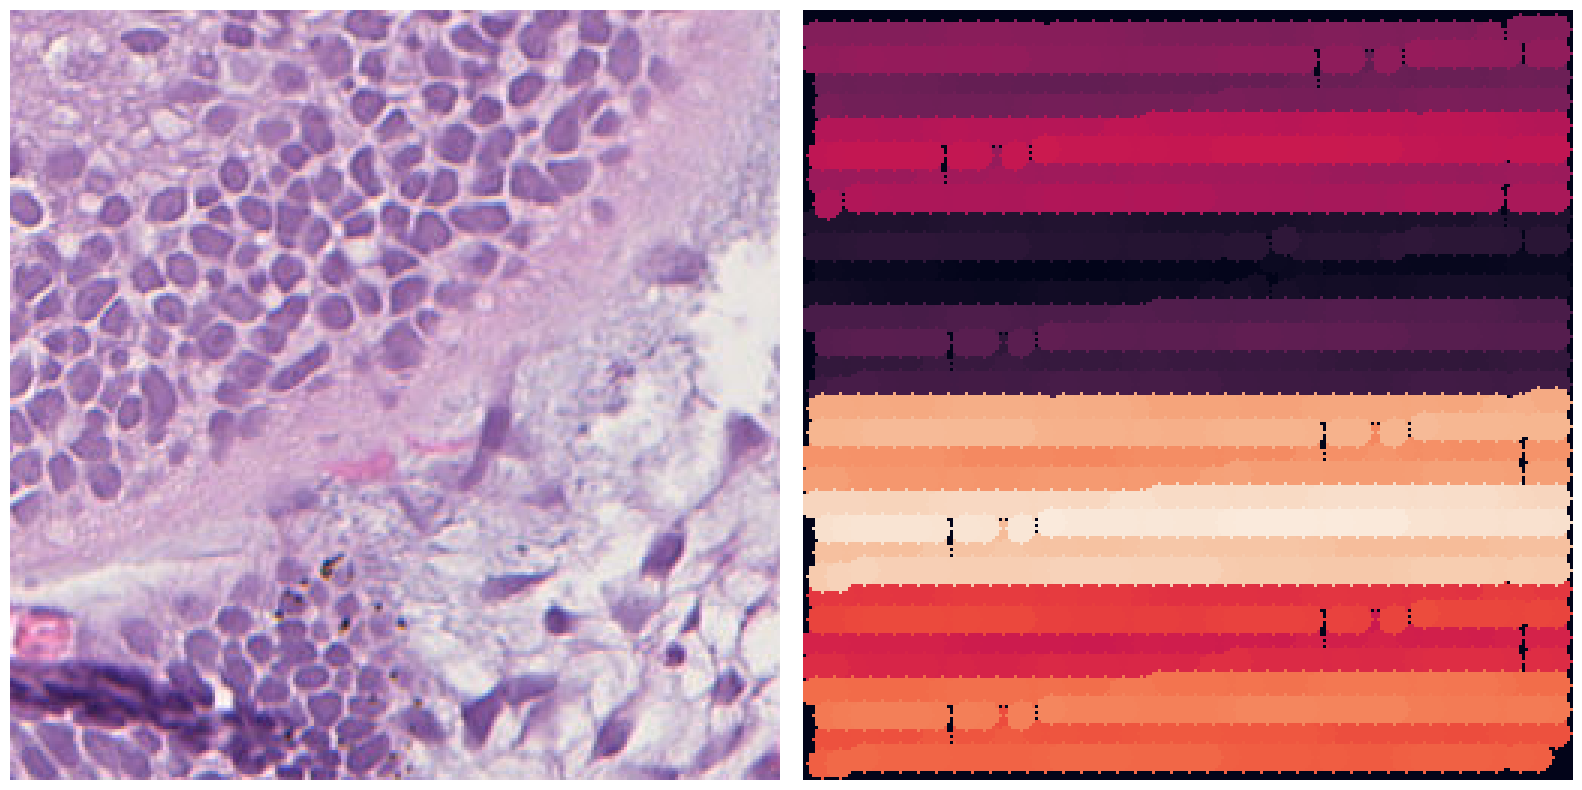

In [54]:
oo = 0
HE_im = HE_tiles[oo]
seg = np.array(predictions[b][oo])
show_HE_and_segmented(HE_im,seg)

In [35]:
scores[1][86]

In [57]:
pths[b]

'\\\\10.99.68.178\\andreex\\data\\Stardist\\12_12_hyperparameter_models\\monkey_12_12_2023_lr_0.005_epochs_200_pt_40_gaus_ratio_0'

In [58]:
model_temp = load_model(pths[b])

base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.005_epochs_200_pt_40_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.11256776483361276, nms=0.3) 


In [59]:
temp_predictions = get_predictions(model_temp)

100%|██████████| 36/36 [00:05<00:00,  6.99it/s]


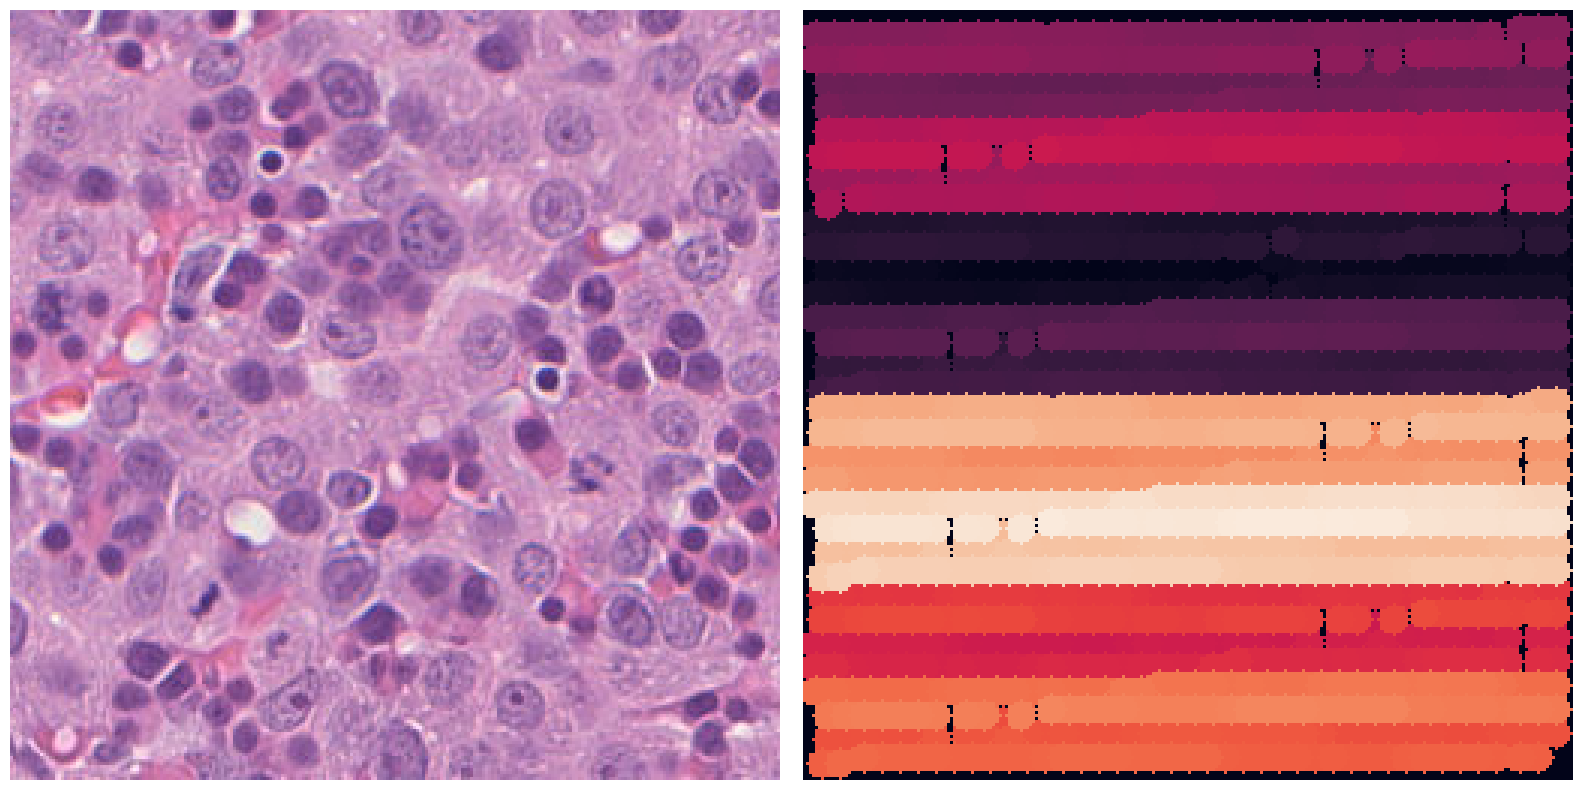

In [62]:
oo=3

HE_im = HE_tiles[oo]

show_HE_and_segmented(HE_im,temp_predictions[oo])

In [45]:
print(len(dfs[0]))
print(len(dfs[1]))
print(len(dfs[2]))
print(len(dfs[3]))
print(len(dfs[4]))

96
96
96
96
96


In [46]:
dfs_t = list(map(list, zip(*dfs))) # transpose list

In [47]:
dfs_t[0][3].head()

Organ   TP   FP   FN        AP    Recall  Precision        F1  Tau
0   eyes  198  163  241  0.328904  0.451025   0.548476  0.495000  0.8
1   bone   70   56   96  0.315315  0.421687   0.555556  0.479452  0.8
2  liver  195  115  177  0.400411  0.524194   0.629032  0.571848  0.8
3   ears   92  228  288  0.151316  0.242105   0.287500  0.262857  0.8
4  brain  476  459  645  0.301266  0.424621   0.509091  0.463035  0.8

In [48]:
dfs_t[1][3].head()

Organ   TP   FP   FN        AP    Recall  Precision        F1  Tau
0   eyes  194  163  245  0.322259  0.441913   0.543417  0.487437  0.8
1   bone   70   55   96  0.316742  0.421687   0.560000  0.481100  0.8
2  liver  183  134  189  0.361660  0.491935   0.577287  0.531205  0.8
3   ears   91  242  289  0.146302  0.239474   0.273273  0.255259  0.8
4  brain  470  494  651  0.291022  0.419269   0.487552  0.450839  0.8

In [49]:
dfs_t[2][3].head()

Organ   TP   FP   FN        AP    Recall  Precision        F1  Tau
0   eyes  199  159  240  0.332776  0.453303   0.555866  0.499373  0.8
1   bone   67   57   99  0.300448  0.403614   0.540323  0.462069  0.8
2  liver  184  124  188  0.370968  0.494624   0.597403  0.541176  0.8
3   ears   74  256  306  0.116352  0.194737   0.224242  0.208451  0.8
4  brain  482  476  639  0.301816  0.429973   0.503132  0.463684  0.8

In [51]:
for i, df_list in enumerate(dfs_t):
    for df in df_list:
        if type(df) != int:
            df['pth_model'] = os.path.basename(pths[i])

In [52]:
dfs_t[2][3].head()

Organ   TP   FP   FN        AP    Recall  Precision        F1  Tau  \
0   eyes  199  159  240  0.332776  0.453303   0.555866  0.499373  0.8   
1   bone   67   57   99  0.300448  0.403614   0.540323  0.462069  0.8   
2  liver  184  124  188  0.370968  0.494624   0.597403  0.541176  0.8   
3   ears   74  256  306  0.116352  0.194737   0.224242  0.208451  0.8   
4  brain  482  476  639  0.301816  0.429973   0.503132  0.463684  0.8   

                                           pth_model  
0  monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_g...  
1  monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_g...  
2  monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_g...  
3  monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_g...  
4  monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_g...

In [54]:
import pickle

file_path = r'\\10.99.68.178\andreex\data\Stardist\hyperparameter_testing_12_13_data\results_FINAL.pkl'

file_path = r'C:\Users\Donald\results_hyperparameter_testing.pkl'

if not os.path.exists(file_path):

    # Pickle the DataFrame
    with open(file_path, 'wb') as file:
        pickle.dump(dfs_t, file)

    print(f'DataFrame has been pickled and saved to {file_path}')

DataFrame has been pickled and saved to C:\Users\Donald\results_hyperparameter_testing.pkl


In [55]:
len(dfs)

5

In [56]:
def mean_avg_precision(df):    
    MAP = 0

    for i in range(len(df)):
        row = df.iloc[i]

        MAP += row['AP']

    MAP = MAP/len(df)

    return MAP

In [81]:
model_mAPs = []
for df_list in dfs_t:
    mAPs = []
    for df in df_list:
        if type(df) != int:
            # print(df.iloc[0]['Tau'])
            #df.head()
            mAP = mean_avg_precision(df)
            # print(mAP)
            mAPs.append(mAP)
        else:
            mAPs.append(0)
    model_mAPs.append(mAPs)

In [82]:
model_mAPs[0]

[0.6497455474443673,
 0.5766752438649796,
 0.4533550150533056,
 0.27279020411182797,
 0.04932570569300726]

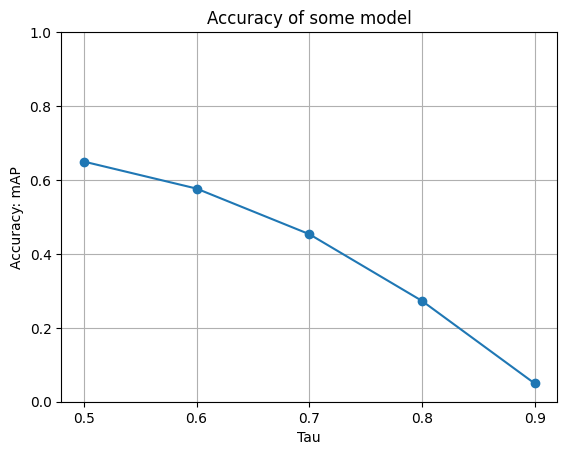

In [83]:
plt.plot(taus, model_mAPs[0], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Tau')
plt.ylabel('Accuracy: mAP')
plt.title('Accuracy of some model')
plt.xticks(taus)
plt.ylim(0, 1)
plt.grid('on')

# Display the plot
plt.show()

In [80]:
mAPs

[0.007738266393916934,
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [84]:
import numpy as np
from scipy import integrate

aucs = []
means=[]

for i, mAPs in enumerate(model_mAPs):
    print(pths[i])
    if mAPs != 0:
        area_under_curve = integrate.trapz(mAPs, taus)
        mean = np.mean(mAPs)
    else:
        area_under_curve = 0
        mean = 0
    print(f"Area under the curve: {area_under_curve}")
    aucs.append(area_under_curve)
    print(f'Mean value on curve: {mean}\n')
    means.append(mean)

\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0
Area under the curve: 0.16523560895988007
Mean value on curve: 0.40037834323349764

\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_10_gaus_ratio_0.1
Area under the curve: 0.1629429119938852
Mean value on curve: 0.39381483025265196

\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0
Area under the curve: 0.16162515391789242
Mean value on curve: 0.39113212671129605

\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_20_gaus_ratio_0.1
Area under the curve: 0.16219975087890953
Mean value on curve: 0.3927107086411793

\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.0005_epochs_100_pt_30_gaus_ratio_0
Area under the curve: 0.1624879708231852
Mean v

In [85]:
means

[0.40037834323349764,
 0.39381483025265196,
 0.39113212671129605,
 0.3927107086411793,
 0.39366746507374706,
 0.39093183679651433,
 0.38548581921410185,
 0.3671995719790507,
 0.3996241489098248,
 0.3995363846115184,
 0.3882349746526558,
 0.387566707427248,
 0.37924517961348897,
 0.3764615022170199,
 0.39185830965430946,
 0.39120264947913086,
 0.38291865733890573,
 0.3660491963340501,
 0.391238152119464,
 0.3872537236098663,
 0.36306177572956083,
 0.3739806763624898,
 0.38827924028155547,
 0.3673021968530255,
 0.4062890570772468,
 0.3839387404314357,
 0.3903395391224147,
 0.3848440890657262,
 0.4018676694487997,
 0.38039512960053773,
 0.39374565082375274,
 0.3924886446663874,
 0.4011248664989804,
 0.38224087523968087,
 0.40522291203064925,
 0.3831953090931294,
 0.3741992211931532,
 0.38333909320513376,
 0.3834182930380088,
 0.401857283320349,
 0.4086957159539037,
 0.3852276320756518,
 0.39534874280523213,
 0.3826472300195142,
 0.3911122764637446,
 0.3930849009337948,
 0.3866675981495356

In [90]:
ind = np.argmax(means)
print(ind)
print(means[ind])

40
0.4086957159539037


In [92]:
ind = np.argmax(aucs)
print(ind)
print(aucs[ind])

40
0.1692198365642436


In [93]:
pths[ind]

'\\\\10.99.68.178\\andreex\\data\\Stardist\\12_12_hyperparameter_models\\monkey_12_12_2023_lr_0.001_epochs_400_pt_10_gaus_ratio_0'

In [86]:
len(means)

96

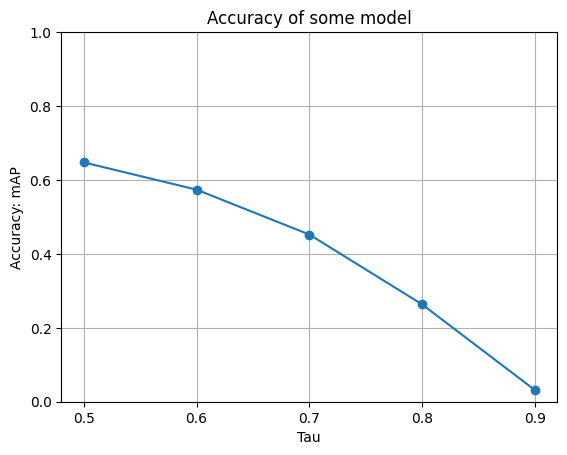

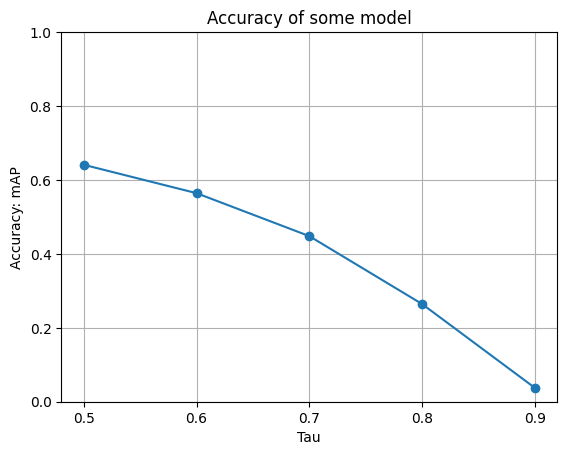

In [63]:
plt.plot(taus, model_mAPs[1], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Tau')
plt.ylabel('Accuracy: mAP')
plt.title('Accuracy of some model')
plt.xticks(taus)
plt.ylim(0, 1)
plt.grid('on')

# Display the plot
plt.show()

plt.plot(taus, model_mAPs[2], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Tau')
plt.ylabel('Accuracy: mAP')
plt.title('Accuracy of some model')
plt.xticks(taus)
plt.ylim(0, 1)
plt.grid('on')

# Display the plot
plt.show()